In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f1 = open("wx-data.txt", "r")

In [9]:
i = 0
while i < 5:
    print(f1.readline().replace('\n', ''))
    i = i + 1

1419408018	0R1,Dn=059D,Dm=064D,Dx=075D,Sn=8.9M,Sm=9.6M,Sx=10.3M
1419408019	0R1,Dn=059D,Dm=065D,Dx=075D,Sn=8.8M,Sm=9.5M,Sx=10.3M
1419408020	0R1,Dn=059D,Dm=065D,Dx=075D,Sn=8.8M,Sm=9.5M,Sx=10.3M
1419408021	0R1,Dn=059D,Dm=065D,Dx=075D,Sn=8.8M,Sm=9.6M,Sx=10.3M
1419408022	0R1,Dn=061D,Dm=066D,Dx=075D,Sn=8.8M,Sm=9.7M,Sx=10.3M


In [10]:
f2 = open("wxt-520-format.txt", "r")

In [11]:
print(f2.read())

Sn      Wind speed minimum m/s, km/h, mph, knots #,M, K, S, N
Sm      Wind speed average m/s, km/h, mph, knots #,M, K, S, N
Sx      Wind speed maximum m/s, km/h, mph, knots #,M, K, S, N
Dn      Wind direction minimum deg #, D
Dm      Wind direction average deg #, D
Dx      Wind direction maximum deg #, D
Pa      Air pressure hPa, Pa, bar, mmHg, inHg #, H, P, B, M, I
Ta      Air temperature °C, °F #, C, F
Tp      Internal temperature °C, °F #, C, F
Ua      Relative humidity %RH #, P
Rc      Rain accumulation mm, in #, M, I
Rd      Rain duration s #, S
Ri      Rain intensity mm/h, in/h #, M, I
Rp      Rain peak intensity mm/h, in/h #, M, I
Hc      Hail accumulation hits/cm2, hits/in2, hits #, M, I, H
Hd      Hail duration s #, S
Hi      Hail intensity hits/cm2h, hits/in2h, hits/ h #, M, I, H
Hp      Hail peak intensity hits/cm2h, hits/in2h, hits/ h #, M, I, H
Th      Heating temperature °C, °F #, C, F
Vh      Heating voltage V #, N, V, W, F2
Vs      Supply voltage V V
Vr      3.5 V ref. 

In [19]:
df = pd.read_csv('wx-data.txt', sep="\t", header=None)
df.columns = ["time", "txt_temperature"]

In [20]:
df.head()

,time,txt_temperature
0,1419408000,"0R1,Dn=038D,Dm=079D,Dx=120D,Sn=2.8M,Sm=6.0M,Sx..."
1,1419408001,"0R1,Dn=038D,Dm=074D,Dx=120D,Sn=2.8M,Sm=6.2M,Sx..."
2,1419408002,"0R1,Dn=038D,Dm=071D,Dx=120D,Sn=2.8M,Sm=6.5M,Sx..."
3,1419408003,"0R1,Dn=038D,Dm=067D,Dx=120D,Sn=2.8M,Sm=6.8M,Sx..."
4,1419408004,"0R1,Dn=038D,Dm=062D,Dx=081D,Sn=2.8M,Sm=7.2M,Sx..."


In [21]:
def getTmp(a, tmp = 'Ta', rlc = 'C'):
    x = list(filter(lambda k: tmp in k, a.split(',')))
    if len(x) == 1:
        return x[0][3:].replace(rlc, '')

### Create Ta Dataframe

In [22]:
dfTa = df.copy()

In [23]:
dfTa['temperature'] = dfTa.apply(lambda x: getTmp(x['txt_temperature']), axis=1)

In [27]:
dfTa.dropna(inplace=True)

In [28]:
dfTa.head()

,time,txt_temperature,temperature
7,1419408006,"0R2,Ta=13.9C,Ua=28.5P,Pa=889.9H",13.9
18,1419408016,"0R2,Ta=13.9C,Ua=28.5P,Pa=889.9H",13.9
27,1419408024,"0R0,Dn=057D,Dm=064D,Dx=069D,Sn=8.8M,Sm=9.6M,Sx...",13.9
31,1419408026,"0R2,Ta=13.9C,Ua=28.4P,Pa=889.9H",13.9
42,1419408036,"0R2,Ta=13.9C,Ua=28.3P,Pa=889.7H",13.9


In [29]:
dfTa['temperature'] = dfTa['temperature'].astype('float')

In [31]:
dfTa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 7 to 97917
Data columns (total 3 columns):
time               10080 non-null int64
txt_temperature    10080 non-null object
temperature        10080 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 315.0+ KB


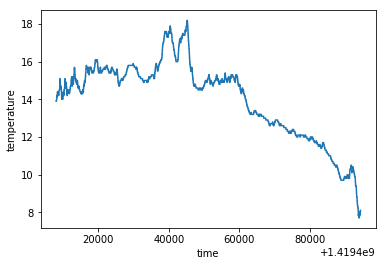

In [32]:
sns.lineplot(x="time", y="temperature",
             data=dfTa)

### Create Dn Dataframe

In [35]:
dfDn = df.copy()

In [36]:
dfDn['temperature'] = dfTa.apply(lambda x: getTmp(x['txt_temperature'], tmp='Dn', rlc='D'), axis=1)

In [37]:
dfDn.dropna(inplace=True)

In [38]:
dfDn.head()

,time,txt_temperature,temperature
27,1419408024,"0R0,Dn=057D,Dm=064D,Dx=069D,Sn=8.8M,Sm=9.6M,Sx...",057
95,1419408084,"0R0,Dn=056D,Dm=062D,Dx=066D,Sn=8.4M,Sm=8.8M,Sx...",056
163,1419408144,"0R0,Dn=058D,Dm=060D,Dx=065D,Sn=8.4M,Sm=9.1M,Sx...",058
231,1419408204,"0R0,Dn=060D,Dm=064D,Dx=068D,Sn=7.4M,Sm=8.5M,Sx...",060
299,1419408264,"0R0,Dn=056D,Dm=057D,Dx=060D,Sn=7.5M,Sm=8.1M,Sx...",056


In [40]:
dfDn['temperature'] = dfDn['temperature'].astype('float')

In [42]:
dfDn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 27 to 97880
Data columns (total 3 columns):
time               1440 non-null int64
txt_temperature    1440 non-null object
temperature        1440 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 45.0+ KB


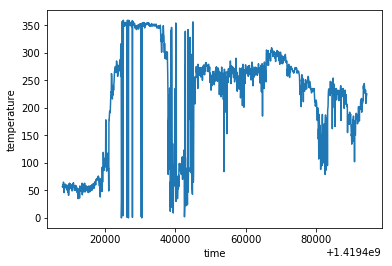

In [43]:
sns.lineplot(x="time", y="temperature",
             data=dfDn)